<a href="https://colab.research.google.com/github/InonS/Open-GPGPU-ANN/blob/master/Google_Colaboratory_test_ogpgpuann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Verification of the [Open Source GPGPU support for Artificial Neural Networks](https://github.com/InonS/Open-GPGPU-ANN) project

## Fetch repo

Fetch the code to be verified

In [0]:
% cd /content
# !git clone git@github.com:InonS/Open-GPGPU-ANN.git
!git clone https://github.com/InonS/Open-GPGPU-ANN.git

/content
fatal: destination path 'Open-GPGPU-ANN' already exists and is not an empty directory.


To see what we got, let's install `tree`

In [0]:
!apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


Run `tree` to see what we fetched

In [0]:
!tree

Streaming output truncated to the last 5000 lines.
│   │   │   │   │       ├── keras-plaid-ocl-gfx803
│   │   │   │   │       │   └── BATCH_SIZE=1
│   │   │   │   │       │       ├── result.json
│   │   │   │   │       │       └── result.npy
│   │   │   │   │       ├── keras-plaid-ocl-gfx804
│   │   │   │   │       │   └── BATCH_SIZE=1
│   │   │   │   │       │       ├── result.json
│   │   │   │   │       │       └── result.npy
│   │   │   │   │       ├── keras-plaid-ocl-gfx900
│   │   │   │   │       │   ├── BATCH_SIZE=1
│   │   │   │   │       │   │   ├── result.json
│   │   │   │   │       │   │   └── result.npy
│   │   │   │   │       │   ├── BATCH_SIZE=16
│   │   │   │   │       │   │   ├── result.json
│   │   │   │   │       │   │   └── result.npy
│   │   │   │   │       │   └── BATCH_SIZE=32
│   │   │   │   │       │       ├── result.json
│   │   │   │   │       │       └── result.npy
│   │   │   │   │       ├── keras-plaid-ocl-gp100gl
│   │   │   │   │       │   ├── BATCH_SIZE

Use notebook magic to change directory to the project source root directory, and stay there from now on

In [0]:
%cd Open-GPGPU-ANN

/content/Open-GPGPU-ANN


## Verification plan

1. Test OCL support on Google Colaboratory
    1. testocl
        1. median_filter_example.py
    2. test_pyopencl.py
    3. test_SYCL.cpp
    4. testocv
        1. test_ocv.py
1. Test OCL support of DL libraries
    1. test_pycaffe.py
    2. testkeras
        1. testKeras.py
        2. testKerasFunctional.py
        3. testKerasFunctionalMinimal.py
        4. testKerasFunctionalStreaming.py
    3. testnengo
        1. nengo_dl_test.py
        2. nengo_ocl_test.py
    4. testplaidml
        1. plaidml_setup.py
        2. hello_vgg19.py
        3. test_plaidml.py
    5. test_veles.py

## HW support

Ask the NVIDIA System Machine Interface if it knows what's up with our GPU

In [0]:
!nvidia-smi

Sun Feb 16 23:04:54 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Find out what OpenCL (OCL) is supported by the GPU

In [0]:
!clinfo

Number of platforms                               1
  Platform Name                                   NVIDIA CUDA
  Platform Vendor                                 NVIDIA Corporation
  Platform Version                                OpenCL 1.2 CUDA 10.1.152
  Platform Profile                                FULL_PROFILE
  Platform Extensions                             cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_copy_opts cl_nv_create_buffer
  Platform Extensions function suffix             NV

  Platform Name                                   NVIDIA CUDA
Number of devices                                 1
  Device Name                                     Tesla T4
  Device Vendor                                   NVIDIA Corporation
  Device Vendor 

In [0]:
# %%markdown README.md
# Apparently unsupported by Google Colaboratory (https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-markdown)

# ! cat README.md

## Test OCL support on Google Colaboratory

### Test OCL

#### Verify PyOpenCL installation

In [0]:
!pip install pyopencl

In [0]:
!python test_pyopencl.py

Number of platforms                               1
  Platform Name                                   NVIDIA CUDA
  Platform Vendor                                 NVIDIA Corporation
  Platform Version                                OpenCL 1.2 CUDA 10.1.152
  Platform Profile                                FULL_PROFILE
  Platform Extensions                             cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_copy_opts cl_nv_create_buffer
  Platform Extensions function suffix             NV

  Platform Name                                   NVIDIA CUDA
Number of devices                                 1
  Device Name                                     Tesla T4
  Device Vendor                                   NVIDIA Corporation
  Device Vendor 

#### Verify PyOpenCL by running an example: Median filtering

In [0]:
!pip install scipy==1.1.0

In [0]:
%cd testocl

/content/Open-GPGPU-ANN/testocl


Run the median filter example from the CLI

In [0]:
# !python median_filter_example.py

Run the median filter example from a notebook cell

In [0]:
from median_filter_example import main as median_filter_example_main
 
# median_filter_example_main()

Import the source code for the median filter example `main()` function

In [0]:
print(median_filter_example_main.__code__)

<code object main at 0x7fb800239c00, file "/content/Open-GPGPU-ANN/testocl/median_filter_example.py", line 69>


Copy-paste the source code for the median filter example `main()` function, and execute as a notebook cell

Imports

In [0]:
from enum import IntEnum
from time import perf_counter

from sys import stdout
from logging import basicConfig, debug, DEBUG, exception

from numpy import empty, float32, int32
from pyopencl import Buffer, CommandQueue, Context, Program, enqueue_copy, get_platforms, mem_flags
from scipy.misc import imread, imsave, imshow

First, execture the median filter example `__main__()` preamble

In [0]:
basicConfig(level=DEBUG, stream=stdout)

Import the rest of the functions and global variables from the median filter example

In [0]:
from median_filter_example import get_devices, CL_DEVICE_TYPE, read_kernel_source, allocate_variables, copy_from_buffer

Run the contents of the `main()` function

In [0]:
devices = get_devices()
try:
    debug(CL_DEVICE_TYPE(devices[0].type))
except IndexError as ie:
    exception(ie)
context = Context(devices)
queue = CommandQueue(context)  # Create queue for each kernel execution

source = read_kernel_source("median_filter.cl")
program = Program(context, source).build()  # Kernel function instantiation

image = imread('../data/noisyImage.jpg', flatten=True).astype(float32)  # Read in image
# imshow(image)

start_usec = perf_counter()
args = allocate_variables(context, image)

program.medianFilter(queue, image.shape, None, *args)  # Call Kernel.
# Automatically takes care of block/grid distribution. Note explicit naming of kernel to execute.

result = copy_from_buffer(queue, args[1], image.shape, image.dtype)  # Copy the result back from buffer
debug("%g milliseconds" % (1e3 * (perf_counter() - start_usec)))

# imshow(result)
imsave('../data/medianFilter-OpenCL.jpg', result)  # Show the blurred image

DEBUG:root:[<pyopencl.Device 'Tesla T4' on 'NVIDIA CUDA' at 0x37a62b0>]
DEBUG:root:CL_DEVICE_TYPE.GPU
DEBUG:pyopencl.cache:build program: binary cache hit (key: 89705b688f1c8d9065312f82f33cbd9d)
DEBUG:pytools.persistent_dict:pyopencl-invoker-cache-v6: disk cache hit [key=fc5b0a2173489db9dd9ac1e050c70e2d3191c2acfa0109fcf79cdbbf1614a4fe]
DEBUG:root:5.2733 milliseconds


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


`imshow()` from `scipy.misc` has been deprecated, replace by the one from `matplotlib.pyplot`

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:

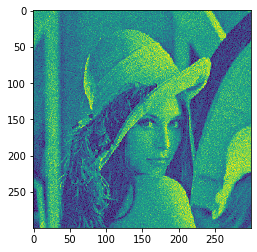

In [0]:
from matplotlib.pyplot import imshow

imshow(image)

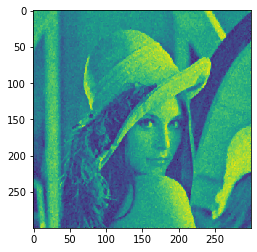

In [0]:
imshow(result)

### Test SYCL

In [0]:
%cd /content

/content


In [0]:
!git clone https://github.com/triSYCL/triSYCL

fatal: destination path 'triSYCL' already exists and is not an empty directory.


In [0]:
# !apt install clang-9 g++-9 libboost-dev

In [0]:
%cd /content/triSYCL
!mkdir -p build
%cd build
!cmake .. -DTRISYCL_OPENCL=ON
!make -j $[2*$(nproc)+1]

/content/triSYCL
/content/triSYCL/build
-- host compiler - gcc 7.4.0
-- Found triSYCL include directory: /content/triSYCL/include
-- Found OpenMP_CXX: -fopenmp  
-- Found OpenMP: TRUE   
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--   chrono
--   log
--   filesystem
--   system
--   date_time
--   log_setup
--   thread
--   regex
--   atomic
-- triSYCL OpenMP:                   ON
-- triSYCL TBB:                      OFF
-- triSYCL OpenCL:                   ON
-- triSYCL synchronous execution:    OFF
-- triSYCL debug mode:               OFF
-- triSYCL object trace:             OFF
-- triSYCL kernel trace:             OFF
-- Configuring done
-- Generating done
-- Build files have been written to: /content/triSYCL/build
[  1%] Built target 2014-04-21-HPC-GPU_Meetup_slide_14
[  2%] Built target 2014-04-21-HPC-GPU_Meetup_slide_22
[  3%] Built target 2014-04-21-HPC-GPU_Meetup_slide_7
[  4%] Built target 2014-04-21-HPC-GPU_Meetup_slide_17-18
[  5%] Built target 2014-04-

In [0]:
!ctest

Test project /content/triSYCL/build
        Start   1: 2014-04-21-HPC-GPU_Meetup/slide_7
  1/118 Test   #1: 2014-04-21-HPC-GPU_Meetup/slide_7 .....................   Passed    0.01 sec
        Start   2: 2014-04-21-HPC-GPU_Meetup/slide_9-20
  2/118 Test   #2: 2014-04-21-HPC-GPU_Meetup/slide_9-20 ..................   Passed    0.01 sec
        Start   3: 2014-04-21-HPC-GPU_Meetup/slide_13
  3/118 Test   #3: 2014-04-21-HPC-GPU_Meetup/slide_13 ....................***Exception: Child aborted  0.40 sec
        Start   4: 2014-04-21-HPC-GPU_Meetup/slide_14
  4/118 Test   #4: 2014-04-21-HPC-GPU_Meetup/slide_14 ....................***Exception: Child aborted  0.19 sec
        Start   5: 2014-04-21-HPC-GPU_Meetup/slide_17-18
  5/118 Test   #5: 2014-04-21-HPC-GPU_Meetup/slide_17-18 .................   Passed    0.01 sec
        Start   6: 2014-04-21-HPC-GPU_Meetup/slide_21
  6/118 Test   #6: 2014-04-21-HPC-GPU_Meetup/slide_21 ....................   Passed    0.01 sec
        Start   7: 2014-04-2

In [0]:
# Additional tests implementd for LLVM's Integrated Tester (LIT)
# https://github.com/triSYCL/triSYCL/blob/master/tests/README.rst#42using-make-and-lit

### Test OCV

Satisfy "../data/mobilenet_v2_1.0_96/mobilenet_v2_1.0_96_frozen.pb

In [0]:
%cd /content/Open-GPGPU-ANN
!mkdir -p data/mobilenet_v2_1.0_96
%cd data/mobilenet_v2_1.0_96
!wget https://storage.googleapis.com/mobilenet_v2/checkpoints/mobilenet_v2_1.0_96.tgz
!tar xvf mobilenet_v2_1.0_96.tgz


/content/Open-GPGPU-ANN
/content/Open-GPGPU-ANN/data/mobilenet_v2_1.0_96
--2020-02-16 23:06:15--  https://storage.googleapis.com/mobilenet_v2/checkpoints/mobilenet_v2_1.0_96.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78327491 (75M) [application/x-tar]
Saving to: ‘mobilenet_v2_1.0_96.tgz.1’

mobilenet_v2_1.0_96 100%[===================>]  74.70M  81.6MB/s    in 0.9s    

2020-02-16 23:06:16 (81.6 MB/s) - ‘mobilenet_v2_1.0_96.tgz.1’ saved [78327491/78327491]

./
./mobilenet_v2_1.0_96_frozen.pb
./mobilenet_v2_1.0_96_info.txt
./mobilenet_v2_1.0_96.ckpt.index
./mobilenet_v2_1.0_96.tflite
./mobilenet_v2_1.0_96.ckpt.data-00000-of-00001
./mobilenet_v2_1.0_96.ckpt.meta
./mobilenet_v2_1.0_96_eval.pbtxt


In [0]:
%cd /content/Open-GPGPU-ANN/testocv
# !cat test_ocv.py

/content/Open-GPGPU-ANN/testocv


In [0]:
# utf-8

"""
1. https://github.com/opencv/opencv/blob/master/samples/cpp/neural_network.cpp
2. Detailed example: https://github.com/arnaudgelas/OpenCVExamples/blob/master/NeuralNetwork/NeuralNetwork.cpp
3. https://github.com/opencv/opencv/tree/master/samples/dnn
"""

from logging import DEBUG, basicConfig, debug, info, warning
from os.path import extsep, join as path_join, pardir
from sys import stdout
from time import perf_counter
from timeit import timeit
from typing import List, Tuple
from functools import reduce

from PIL.Image import Image
from cv2 import TERM_CRITERIA_EPS, TERM_CRITERIA_MAX_ITER, dnn_Net, getTickFrequency, haveOpenVX, ml_ANN_MLP, rectangle, \
    setUseOpenVX, setUseOptimized, useOpenVX, useOptimized, CV_8U, cvtColor, COLOR_GRAY2BGR
from cv2.dnn import DNN_BACKEND_HALIDE, DNN_TARGET_OPENCL, blobFromImage, readNetFromTensorflow, DNN_BACKEND_OPENCV
from cv2.ipp import getIppVersion, useIPP # , useIPP_NE
from cv2.ml import ANN_MLP_BACKPROP, ANN_MLP_SIGMOID_SYM, ANN_MLP_create, ROW_SAMPLE, TrainData_create
from cv2.ocl import finish, haveAmdBlas, haveAmdFft, haveOpenCL, setUseOpenCL, useOpenCL
from numpy import argmax, array, expand_dims, float32, int32, ndarray, newaxis, ones, reshape, sort, uint16, uint64, uint8, zeros
from pandas import unique
from sklearn.datasets import load_digits
from sklearn.metrics import log_loss
from tensorflow import GraphDef, Session
from tensorflow.python.framework.graph_io import write_graph
from tensorflow.python.platform.gfile import FastGFile
from tensorflow.python.tools.freeze_graph import freeze_graph
from tensorflow.python.tools.optimize_for_inference_lib import optimize_for_inference
from tensorflow.python.training.saver import Saver
from tqdm import tqdm, trange

def ocl_setup():
    have_ocl = haveOpenCL()
    info("have_ocl = %s" % have_ocl)
    if have_ocl:
        if not useOpenCL():
            setUseOpenCL(True)
        info("useOpenCL = %s" % useOpenCL())
    info("haveAmdBlas() = %s" % haveAmdBlas())
    info("haveAmdFft() = %s" % haveAmdFft())


def ovx_setup():
    have_ovx = haveOpenVX()
    info("have_ovx = %s" % have_ovx)
    if have_ovx:
        if not useOpenVX():
            setUseOpenVX(True)
        info("useOpenVX() = %s" % useOpenVX())


def ipp_setup():
    """
    Intel Integrated Performance Primitives (IPP)
    """
    info("getIppVersion = %s" % getIppVersion())
    info("useIPP = %s" % useIPP())
    # info("useIPP_NE = %s" % useIPP_NE())


def optimized_setup():
    """
    SSE2, NEON, etc.
    """
    if not useOptimized():
        setUseOptimized(True)
    info("useOptimized() = %s" % useOptimized())


def get_data() -> Tuple[ndarray, ndarray]:
    data, target = load_digits(return_X_y=True)
    return data, target


def train_mlp(training_data: ndarray, index: List[uint8]):

    n_layers = 3
    layer_sizes = zeros((n_layers, 1), dtype=uint8)  # UMat(3, 1, CV_32SC1).get()

    debug("number of samples = {}, samples shape = {}".format(len(training_data), training_data.shape[1:]))
    input_dim = reduce(lambda a,b: a*b, training_data.shape[1:], 1)
    assert input_dim == 1 << 6
    layer_sizes[0] = input_dim

    hidden_neurons = 1 << 7
    layer_sizes[1] = hidden_neurons

    debug("number of possible outputs = {}".format(max(index)+1))
    output_dim = max(index) + 1    
    assert output_dim == 10 # 12
    layer_sizes[2] = output_dim

    mlp: ml_ANN_MLP = ANN_MLP_create()
    mlp.setLayerSizes(layer_sizes)
    mlp.setActivationFunction(ANN_MLP_SIGMOID_SYM, 1, 1)

    n_max_iter = uint8(1e+3)
    max_epsilon = 1e-5
    criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, n_max_iter, max_epsilon)
    mlp.setTermCriteria(criteria)

    mlp.setTrainMethod(ANN_MLP_BACKPROP, 0.1, 0.1)

    train_classes = poker(index, output_dim, training_data)

    koker(mlp, train_classes, training_data)

    if mlp.isTrained():
        predict_ones_vector(mlp, train_classes, training_data)
        predict_validation(mlp, training_data, train_classes)
        mlp.save("neural_network.xml")
    else:
        warning("training failed!")

    return mlp


def poker(index: List[uint8], output_dim, training_data):
    """
    one-hot encoding
    """
    train_classes = zeros((len(training_data), output_dim),
                          dtype=float32)  # UMat(training_data.rows, output_neurons, CV_32FC1).get()
    for i in trange(len(train_classes), desc=None, file=stdout, mininterval=2, unit='sample'):
        train_classes[i, index[i]] = 1
        # debug("Row of train_class: {}".format(train_classes[i]))
        # debug("Row of train_data: {}".format(training_data[i]))
    return train_classes


def koker(mlp: ml_ANN_MLP, train_classes, training_data):
    """
    train
    """
    assert training_data.dtype == float32 or training_data.dtype == int32  # CV_32S (type 4) or CV_32F (type 5)
    assert train_classes.dtype == float32

    td = TrainData_create(training_data, ROW_SAMPLE, train_classes)
    t = timeit("mlp.train(td)", number=1, globals={"mlp": mlp, "td": td})
    info("Training Done (took %f seconds, %f ms per sample)" % (t, 1e3 * t / len(training_data)))


def predict_ones_vector(mlp: ml_ANN_MLP, train_classes, training_data):
    assert training_data.dtype == int32 or training_data.dtype == float32
    assert training_data.shape[1] == mlp.getLayerSizes()[0]

    result = zeros(train_classes.shape[1], dtype=float32)
    assert result.dtype == int32 or result.dtype == float32

    sample = ones((1, training_data.shape[1]), training_data.dtype)
    assert sample.dtype == int32 or sample.dtype == float32
    assert sample.shape[1] == mlp.getLayerSizes()[0]

    predicted, result = mlp.predict(sample)
    info("One-vector prediction {}".format("failed!" if not predicted else ": {}".format(result)))
    return result


def predict_validation(mlp: ml_ANN_MLP, training_data, train_classes):
    predicted = zeros(train_classes.shape[1], dtype=float32)
    assert predicted.dtype == int32 or predicted.dtype == float32

    n_correct = 0
    ll = 0
    for i, sample in tqdm(enumerate(training_data), desc="predict validation", file=stdout, mininterval=2):
        sample = reshape(sample, (1, len(sample)))

        assert sample.dtype == int32 or sample.dtype == float32
        assert sample.shape[1] == mlp.getLayerSizes()[0]

        predicted, result = mlp.predict(sample)
        predicted = uint64(predicted)
        expected = train_classes[i]
        ll += log_loss(reshape(expected, (1, len(expected))), result)
        is_correct = predicted == argmax(expected)  # and allclose(predicted, expected, rtol=5e-2, atol=5e-2)
        n_correct += 1 if is_correct else 0
        # debug("Predict training data ({}): {}".format(is_correct, predicted))
    info("accuracy = %f, log loss per sample = %f" % (
        n_correct / len(training_data), ll / len(training_data)))  # https://en.wikipedia.org/wiki/Confusion_matrix


def time_inference(mlp: ml_ANN_MLP, samples, use_timeit=False):
    if use_timeit:
        results = None
        t = timeit("_, results = mlp.predict(samples)", number=1,
                   globals={"mlp": mlp, "samples": samples, "results": results})
    else:
        start = perf_counter()
        _, results = mlp.predict(samples)
        t = perf_counter() - start

    info("Inference Done (took %f seconds, %f ms per sample)" % (t, 1e3 * t / len(samples)))


def tf_freeze_graph(sess: Session, saver: Saver, model_name: str, logdir: str,
                    model_suffix: str = "pb", conf_suffix: str = "pbtxt", checkpoint_suffix: str = "ckpt"):
    """
    python freeze_graph.py --output_graph =./pbs/frozenGraph.pb --output_node_names=genderOut,ageOut --input_binary=true
    """
    input_conf = write_graph(sess.graph_def, logdir, extsep.join('_'.join((model_name, "graphDef")), conf_suffix))

    input_binary = True
    input_graph = write_graph(sess.graph_def, logdir, extsep.join('_'.join((model_name, "graphDef")), model_suffix),
                              as_text=False)

    input_checkpoint = saver.save(sess, path_join(logdir, extsep.join(model_name, checkpoint_suffix)))

    output_node_names = ""

    output_graph = path_join(logdir, extsep.join('_'.join((model_name, "frozenGraphDef")), model_suffix))
    freeze_graph(input_graph, "", input_binary, input_checkpoint, output_node_names, "save/restore_all", "save/Const:0",
                 output_graph, True, "")
    return output_graph


def optimize_frozen_graph(logdir: str, frozen_graph: str):
    with FastGFile(path_join(logdir, frozen_graph), mode='rb') as frozen_graph_file:
        frozen_graph_def = GraphDef()
        frozen_graph_def.ParseFromString(frozen_graph_file.read())
        optimized_frozen_graph_def = optimize_for_inference(frozen_graph_def, ["Reshape"], ["softmax"], [])
        optimized_frozen_graph_as_bytes = optimized_frozen_graph_def.SerializeToString()

    optimized_frozen_graph = frozen_graph.replace("_frozen", "_frozen_optimized")
    optimized_frozen_graph_path = path_join(logdir, optimized_frozen_graph)
    with open(optimized_frozen_graph_path, mode='wb') as optimized_frozen_graph_file:
        optimized_frozen_graph_file.write(optimized_frozen_graph_as_bytes)

    return optimized_frozen_graph_path


def read_net_from_tf(model_name: str, logdir: str, frozen_graph: str = None):
    if frozen_graph is None:
        with Session as sess:
            frozen_graph = tf_freeze_graph(sess, Saver(), model_name, logdir)

    debug(frozen_graph)

    graph_path = path_join(logdir, frozen_graph)  # optimize_frozen_graph(logdir, frozen_graph)

    net: dnn_Net = readNetFromTensorflow(graph_path)
    net.setPreferableBackend(DNN_BACKEND_OPENCV) # DNN_BACKEND_HALIDE)
    net.setPreferableTarget(DNN_TARGET_OPENCL)
    return net


def dnn_predict(net: dnn_Net, input_shape, frame: Image, classes):
    """
    https://github.com/opencv/opencv/tree/master/samples/dnn

    https://github.com/tensorflow/models/tree/master/research
    e.g. object_detection (https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API), TF-slim

    https://github.com/opencv/opencv_extra/blob/master/testdata/dnn/download_models.py
    """
    debug("frame.type = {}, frame.size = {}, input_shape = {}".format(type(frame), frame.size, input_shape))
    # debug("frame.depth = {}".format(frame.depth))
    # assert len(frame.size) == 1      

    # image = cvtColor(expand_dims(array(frame), axis=0), COLOR_GRAY2BGR)
    img = array(frame)[..., newaxis]
    debug("img: type = {}, shape = {}, dtype = {}".format(type(img), img.shape, img.dtype))
    image = cvtColor(img, COLOR_GRAY2BGR)
    debug("image: type = {}, shape = {}, dtype = {}, size = {}".format(type(image), image.shape, image.dtype, image.size))
    blob = blobFromImage(image, size=input_shape, ddepth=CV_8U)

    # Run the model
    net.setInput(blob)
    debug("blob: type = {}, shape = {}".format(type(blob), blob.shape))
    assert blob is not None
    # assert blob.shape[-1] % 3 == 0, "Number of input channels should be multiple of 3 but got %d" % blob.shape[-1]    
    out = net.forward()

    # Single object classification: Class with the highest score
    flat_out = out.flatten()
    class_id = argmax(flat_out)
    confidence = flat_out[class_id]

    # Predicted class
    info('%s: %.4f' % (classes[class_id] if classes else 'Class #%d' % class_id, confidence))

    # Multiple object detection:
    bbox_color = (0, 255, 0)
    threshold = 0.5  # 0.3
    for detection in out[0, 0, :, :]:
        score = float(detection[2])
        if score > threshold:
            left = detection[3] * frame.width
            top = detection[4] * frame.height

            right = detection[5] * frame.width
            bottom = detection[6] * frame.height

            tl = (uint16(left), uint16(top))
            br = (uint16(right), uint16(bottom))

            rectangle(frame, tl, br, bbox_color)

    # Efficiency information
    t, _ = net.getPerfProfile()
    info('Inference time: %.2f ms' % (t * 1000.0 / getTickFrequency()))

In [0]:
from PIL.Image import fromarray
from skimage import img_as_ubyte
from numpy import min, max

def prepare_sample(sample_ndarray):

    debug("sample_ndarray: type = {}, shape = {}, dtype = {}".format(type(sample_ndarray), sample_ndarray.shape, sample_ndarray.dtype))

    sample_ndarray = sample_ndarray.reshape((8,8))
    debug("sample_ndarray: shape = {}, dtype = {}, min = {}, max = {}".format(sample_ndarray.shape, sample_ndarray.dtype, min(sample_ndarray), max(sample_ndarray)))
    imshow(sample_ndarray)
    sample_ndarray /= 1<<4

    
    sample = img_as_ubyte(sample_ndarray, CV_8U)
    sample = fromarray(sample) # , mode='RGB') # , mode='F')
    debug("sample: info = {}, size = {}, mode = {}, extrema = {}".format(sample.info, sample.size, sample.mode, sample.getextrema())) # , min(sample), max(sample)))
    sample.show()

    shape = sample.size
    # width = uint16(8)
    # height = uint16(sample.shape[0] / width)
    # shape = width, height

    return shape, sample



INFO:root:have_ocl = True
INFO:root:useOpenCL = True
INFO:root:haveAmdBlas() = False
INFO:root:haveAmdFft() = False
INFO:root:have_ovx = False
INFO:root:getIppVersion = disabled
INFO:root:useIPP = False
INFO:root:useOptimized() = True
DEBUG:root:number of samples = 1797, samples shape = (64,)
DEBUG:root:number of possible outputs = 10
100%|██████████| 1797/1797 [00:00<00:00, 1182671.31sample/s]
INFO:root:Training Done (took 2.301570 seconds, 1.280785 ms per sample)
INFO:root:One-vector prediction : [[-0.02631579 -0.02631579 -0.0260237  -0.02631579 -0.02494266 -0.02631579
  -0.02631579 -0.02631579 -0.0263154  -0.02631579]]
predict validation: 1797it [00:01, 1289.92it/s]
INFO:root:accuracy = 0.893712, log loss per sample = 0.485697
INFO:root:Inference Done (took 0.011845 seconds, 0.006592 ms per sample)
DEBUG:root:mobilenet_v2_1.0_96_frozen.pb
DEBUG:root:sample_ndarray: type = <class 'numpy.ndarray'>, shape = (64,), dtype = float32
DEBUG:root:sample_ndarray: shape = (8, 8), dtype = float

error: ignored

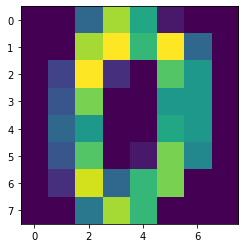

In [0]:
def main():
    ocl_setup()
    ovx_setup()
    # TODO ogl
    ipp_setup()
    optimized_setup()

    x_train, y_train = get_data()
    x_train = x_train.astype(float32)
    
    mlp: ml_ANN_MLP = train_mlp(x_train, list(y_train.tolist()))
    time_inference(mlp, x_train)

    model_name = "mobilenet_v2_1.0_96"
    logdir = path_join(pardir, "data", model_name)
    frozen_graph = extsep.join(('_'.join((model_name, "frozen")), "pb"))
    net = read_net_from_tf(model_name, logdir, frozen_graph)
    
    shape, sample  = prepare_sample(x_train[0])

    dnn_predict(net, shape, sample, sort(unique(y_train)))


if __name__ == '__main__':
    basicConfig(stream=stdout, level=DEBUG)
    main()
    finish()

## Test OCL support of DL libraries

### Test [PlaidML-Keras](https://plaidml.github.io/plaidml/docs/install.html#keras)

In [0]:
%cd /content/Open-GPGPU-ANN && git clone https://github.com/plaidml/plaidml.git

[Errno 2] No such file or directory: '/content/Open-GPGPU-ANN && git clone https://github.com/plaidml/plaidml.git'
/content/Open-GPGPU-ANN/testocv


In [0]:
!pip install ngraph-core plaidml-keras plaidbench

In [0]:
# ! plaidml-setup

In [0]:
! echo "{\"PLAIDML_DEVICE_IDS\":[\"opencl_nvidia_tesla_t4.0\"],\"PLAIDML_EXPERIMENTAL\":false}" > /root/.plaidml

In [0]:
! plaidbench keras mobilenet

Running 1024 examples with mobilenet, batch size 1, on backend plaid
INFO:plaidml:Opening device "opencl_nvidia_tesla_t4.0"
Compiling network... Warming up... Running...
Example finished, elapsed: 0.533s (compile), 9.274s (execution)

-----------------------------------------------------------------------------------------
Network Name         Inference Latency         Time / FPS          
-----------------------------------------------------------------------------------------
mobilenet            9.06 ms                   3.13 ms / 319.79 fps
Correctness: PASS, max_error: 7.026663752185414e-06, max_abs_error: 4.172325134277344e-07, fail_ratio: 0.0


In [0]:
! echo "{\"epsilon\": 1e-07,\"floatx\": \"float32\",\"image_data_format\": \"channels_last\",\"backend\": \"plaidml.keras.backend\"}" > ~/.keras/keras.json

In [0]:
# ! pip install plaidbench[onnx]
# ! plaidbench onnx squeezenet

In [0]:
from os import environ
from keras.backend import backend

# environ["KERAS_BACKEND"] = "plaidml.keras.backend"
backend()

Using plaidml.keras.backend backend.


'plaidml.keras.backend'

In [0]:
from keras.datasets import cifar10

(x_train, y_train_cats), (x_test, y_test_cats) = cifar10.load_data()

In [0]:
from numpy import repeat

batch_size = 1<<3
x_train = x_train[:batch_size]
x_train = repeat(repeat(x_train, batch_size-1, axis=1), batch_size-1, axis=2)

In [0]:
from time import time
from numpy import uint16
from pandas import Series

from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.optimizers import SGD

def time_model(model):

    results = Series()    

    debug(model.name)#summary())
    results.name = model.name
    results["model_name"] = model.name
    
    model.compile(optimizer='SGD', loss=categorical_crossentropy, metrics=[categorical_accuracy])

    info("Running initial batch (compiling tile program)")
    debug("Timing initial batch...")
    start = time()
    y = model.predict(x=x_train, batch_size=batch_size)
    initial_batch_time = time() - start
    debug("Initial batch ran in {:.3f} seconds".format(initial_batch_time))
    results["initial_batch_seconds"] = initial_batch_time

    n_batches = 10
    info("Now start the clock and run {} batches".format(n_batches))
    debug("Timing inference...")
    start = time()
    for i in range(n_batches):
        y = model.predict(x=x_train, batch_size=batch_size)
    total_inference_time = time() - start

    seconds_per_batch = total_inference_time / n_batches    
    fps = n_batches * batch_size / total_inference_time
    debug("{} inference batches ran in {:.3f} seconds (average per batch = {:.0f} ms, FPS = {:.0f})".format(n_batches, total_inference_time, 1000 * seconds_per_batch, fps))
    results["total_inference_seconds"] = total_inference_time
    results["seconds_per_batch"] = total_inference_time / n_batches
    results["fps"] = uint16(fps)
    debug("------------------------------------------------------------")

    return results

In [0]:
from keras.applications import VGG19, MobileNetV2
from keras.applications.nasnet import NASNetMobile

from pandas import concat

timings = None

for model in (VGG19(), MobileNetV2(), NASNetMobile()):
    model_results = time_model(model)
    timings = concat([timings, model_results], axis=1) if timings is not None else model_results

timings

INFO:plaidml:Opening device "opencl_nvidia_tesla_t4.0"


INFO:plaidml:Opening device "opencl_nvidia_tesla_t4.0"
DEBUG:root:vgg19
INFO:root:Running initial batch (compiling tile program)
DEBUG:root:Timing initial batch...
DEBUG:root:Initial batch ran in 3.379 seconds
INFO:root:Now start the clock and run 10 batches
DEBUG:root:Timing inference...
DEBUG:root:10 inference batches ran in 1.278 seconds (average per batch = 128 ms, FPS = 63)
DEBUG:root:------------------------------------------------------------
DEBUG:root:mobilenetv2_1.00_224
INFO:root:Running initial batch (compiling tile program)
DEBUG:root:Timing initial batch...
DEBUG:root:Initial batch ran in 10.358 seconds
INFO:root:Now start the clock and run 10 batches
DEBUG:root:Timing inference...
DEBUG:root:10 inference batches ran in 0.197 seconds (average per batch = 20 ms, FPS = 406)
DEBUG:root:------------------------------------------------------------
DEBUG:root:NASNet
INFO:root:Running initial batch (compiling tile program)
DEBUG:root:Timing initial batch...


INFO:plaidml:Analyzing Ops: 504 of 2910 operations complete


INFO:plaidml:Analyzing Ops: 504 of 2910 operations complete


INFO:plaidml:Analyzing Ops: 1520 of 2910 operations complete


INFO:plaidml:Analyzing Ops: 1520 of 2910 operations complete


INFO:plaidml:Analyzing Ops: 2537 of 2910 operations complete


INFO:plaidml:Analyzing Ops: 2537 of 2910 operations complete
DEBUG:root:Initial batch ran in 6.855 seconds
INFO:root:Now start the clock and run 10 batches
DEBUG:root:Timing inference...
DEBUG:root:10 inference batches ran in 0.423 seconds (average per batch = 42 ms, FPS = 189)
DEBUG:root:------------------------------------------------------------


,vgg19,mobilenetv2_1.00_224,NASNet
model_name,vgg19,mobilenetv2_1.00_224,NASNet
initial_batch_seconds,3.37948,10.3584,6.85515
total_inference_seconds,1.27788,0.197027,0.422548
seconds_per_batch,0.127788,0.0197027,0.0422548
fps,62,406,189


### Test [Apache Singa](http://singa.apache.org/en/develop/build.html#use-opencl)

In [0]:
%cd /content/Open-GPGPU-ANN/
! apt install opencl-headers libviennacl-dev libprotobuf-dev swig libgoogle-glog-dev

/content/Open-GPGPU-ANN
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libprotobuf-dev is already the newest version (3.0.0-9.1ubuntu1).
libviennacl-dev is already the newest version (1.7.1+dfsg1-2ubuntu1).
opencl-headers is already the newest version (2.2~2018.02.21-gb5c3680-1).
swig is already the newest version (3.0.12-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgflags-dev libgflags2.2 libgoogle-glog0v5
The following NEW packages will be installed:
  libgflags-dev libgflags2.2 libgoogle-glog-dev libgoogle-glog0v5
0 upgraded, 4 newly installed, 0 to remove and 25 not upgraded.
Need to get 283 kB of archives.
After this operation, 1,418 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgflags2.2 amd64 2.2.1-1 [72.4 kB]
Get:2 http:/

In [0]:
%cd /content/Open-GPGPU-ANN
! git clone https://github.com/viennacl/viennacl-dev

fatal: destination path 'viennacl-dev' already exists and is not an empty directory.


In [0]:
%cd /content/Open-GPGPU-ANN
! git clone https://gitbox.apache.org/repos/asf/singa.git
%cd singa
! git checkout tags/1.1.0

/content/Open-GPGPU-ANN
fatal: destination path 'singa' already exists and is not an empty directory.
/content/Open-GPGPU-ANN/singa
Note: checking out 'tags/1.1.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at f2ad9338 SINGA-300 Add residual networks for imagenet classification


In [0]:
%cd /content/Open-GPGPU-ANN/singa
! mkdir -p build && pushd build && cmake  -DENABLE_TEST=ON -DUSE_OPENCL=ON -DUSE_MKLDNN=OFF -DUSE_PYTHON3=ON .. && make -j $(nproc) && cd python && pip install . && popd

/content/Open-GPGPU-ANN/singa
/content/Open-GPGPU-ANN/singa/build /content/Open-GPGPU-ANN/singa
-- Found Protobuf: /usr/lib/x86_64-linux-gnu/libprotobuf.so;-lpthread (found version "3.0.0") 
-- Found ViennaCL include: /usr/include
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so (found suitable version "3.6.9", minimum required is "2.7") 
-- Found PythonInterp: /usr/bin/python3 (found suitable version "3.6.9", minimum required is "2.7") 
-- Found SWIG: /usr/bin/swig3.0 (found suitable version "3.0.12", minimum required is "3.0") 
-- Configuring done
-- Generating done
-- Build files have been written to: /content/Open-GPGPU-ANN/singa/build
Scanning dependencies of target gtest
[  1%] Running C++ protocol buffer compiler on /content/Open-GPGPU-ANN/singa/src/proto/model.proto
[  2%] Building CXX object test/CMakeFiles/gtest.dir/gtest/gtest-all.cc.o
[libprotobuf WARNING google/protobuf/compiler/parser.cc:547] No syntax specified for the proto file: model.proto. Please use '

### Test [Codeplay's ComputeCpp for TensorFlow/SYCL](https://github.com/codeplaysoftware/tensorflow)

1. https://developer.codeplay.com/products/computecpp/ce/guides/getting-started
2. https://developer.codeplay.com/products/computecpp/ce/guides/platform-support/hardware-support-tool
3. https://developer.codeplay.com/products/computecpp/ce/guides/tensorflow-guide/tensorflow-generic-setup
4. https://developer.codeplay.com/products/computecpp/ce/guides/tensorflow-guide/tensorflow-native-compilation?#install-toolchains

### Test [PyCaffe](https://github.com/BVLC/caffe/tree/opencl)

In [0]:
!git clone -b opencl https://github.com/BVLC/caffe.git

### Test [Nengo-OCL](https://github.com/nengo/nengo-ocl)